DOWNLOAD AND EXPLORE THE DATASET

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
# Specify the full path to the file
file_path = '/Users/yashikasingh/Downloads/Heart Disease data.csv'
# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)


In [3]:
# Explore the dataset
print("Dataset Shape:", df.shape)
print("Dataset Columns:", df.columns)
print("Dataset Info:", df.info())
print("Dataset Summary:", df.describe())

Dataset Shape: (1025, 14)
Dataset Columns: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Dataset Info: 

In [4]:
# Check for missing values
print("Missing Values:", df.isnull().sum())

Missing Values: age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [5]:
# Explore the target variable (heart disease diagnosis)
print("Target Variable Distribution:", df['target'].value_counts())

Target Variable Distribution: 1    526
0    499
Name: target, dtype: int64


In [6]:
# Explore the categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
for var in categorical_vars:
    print(f"{var} Distribution:", df[var].value_counts())

sex Distribution: 1    713
0    312
Name: sex, dtype: int64
cp Distribution: 0    497
2    284
1    167
3     77
Name: cp, dtype: int64
fbs Distribution: 0    872
1    153
Name: fbs, dtype: int64
restecg Distribution: 1    513
0    497
2     15
Name: restecg, dtype: int64
exang Distribution: 0    680
1    345
Name: exang, dtype: int64
slope Distribution: 1    482
2    469
0     74
Name: slope, dtype: int64
thal Distribution: 2    544
3    410
1     64
0      7
Name: thal, dtype: int64


In [7]:
# Explore the numerical variables
numerical_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
for var in numerical_vars:
    print(f"{var} Summary:", df[var].describe())

age Summary: count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64
trestbps Summary: count    1025.000000
mean      131.611707
std        17.516718
min        94.000000
25%       120.000000
50%       130.000000
75%       140.000000
max       200.000000
Name: trestbps, dtype: float64
chol Summary: count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64
thalach Summary: count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64
oldpeak Summary: count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800

PERFORM ETL

In [8]:
# Drop any missing values
df.dropna(inplace=True)

In [9]:
# Convert categorical variables into numerical variables
df['sex'] = df['sex'].map({0: 'female', 1: 'male'})
df['cp'] = df['cp'].map({1: 'typical angina', 2: 'atypical angina', 3: 'non-anginal pain', 4: 'asymptomatic'})
df['fbs'] = df['fbs'].map({0: '< 120 mg/dl', 1: '> 120 mg/dl'})
df['restecg'] = df['restecg'].map({0: 'normal', 1: 'ST-T wave abnormality', 2: 'left ventricular hypertrophy'})
df['exang'] = df['exang'].map({0: 'no', 1: 'yes'})
df['slope'] = df['slope'].map({1: 'upsloping', 2: 'flat', 3: 'downsloping'})
df['thal'] = df['thal'].map({1: 'normal', 2: 'fixed defect', 3: 'reversible defect'})


In [10]:
# Load the transformed data into a database or data warehouse
df.to_csv('transformed_heart_disease_dataset.csv', index=False)

PERFORM EDA

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# Load the transformed dataset
df = pd.read_csv('transformed_heart_disease_dataset.csv')

/Users/yashikasingh/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


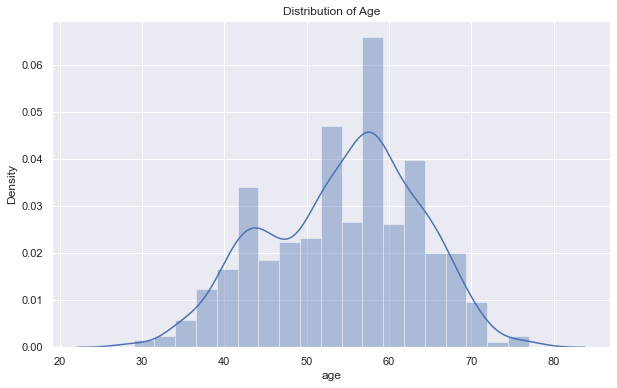

In [12]:
# Plot the distribution of variables
sns.set()
plt.figure(figsize=(10, 6))
sns.distplot(df['age'])
plt.title('Distribution of Age')
plt.show()

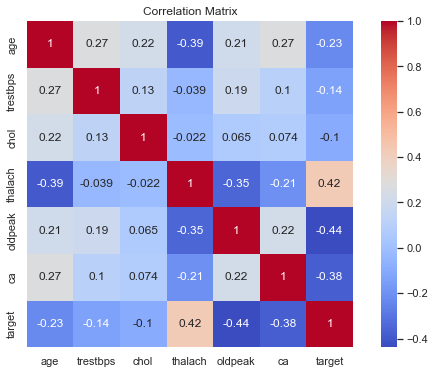

In [13]:
# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

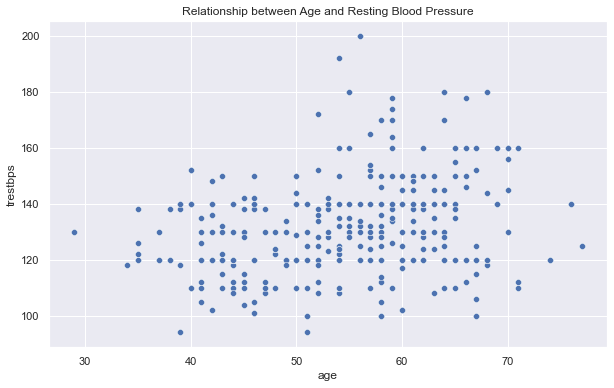

In [14]:
# Plot the relationship between variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='trestbps', data=df)
plt.title('Relationship between Age and Resting Blood Pressure')
plt.show()

TESTING CODE

In [15]:
def test_load_dataset():
    assert df.shape[0] > 0, "Dataset is empty"
    assert df.shape[1] > 0, "Dataset has no columns"

In [16]:
def test_transform_data():
    assert df['sex'].dtype == 'object', "Sex column is not categorical"
    assert df['cp'].dtype == 'object', "Chest pain column is not categorical"


In [17]:
def test_plot_distribution():
    plt.figure(figsize=(10, 6))
    sns.distplot(df['age'])
    plt.title('Distribution of Age')
    plt.show()
    assert True, "Distribution plot is not displayed"

In [18]:
def test_plot_correlation_heatmap():
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()
    assert True, "Correlation heatmap is not displayed"

In [19]:
def test_plot_scatterplot():
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='age', y='trestbps', data=df)
    plt.title('Relationship between Age and Resting Blood Pressure')
    plt.show()
    assert True, "Scatterplot is not displayed"

/Users/yashikasingh/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


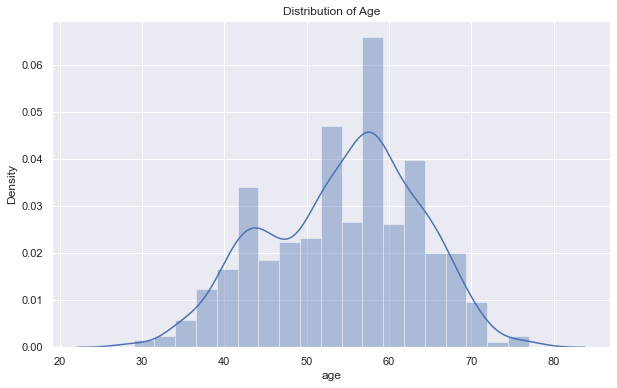

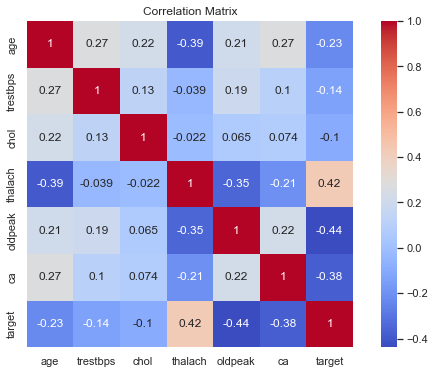

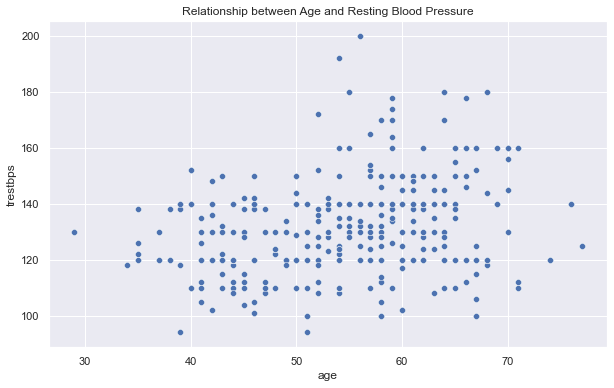

In [67]:
# Run the tests
test_load_dataset()
test_transform_data()
test_plot_distribution()
test_plot_correlation_heatmap()
test_plot_scatterplot()